#Week 09 Keras CNN Implementations Assignment Solution

- Put this notebook under the fma directory
- Build a fully connected neural network whose testing accuracy is greater than 40% 
- Data including features are ready so just write codes to build and complie your model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# we assume you unzip FMA metadata and fma_small in `music_data_mining`, as specified in W07 lab
FMA_DIR = "/content/gdrive/MyDrive/music_data_mining/fma"
%cd '{FMA_DIR}'

/content/gdrive/MyDrive/music_data_mining/fma


In [ ]:
!pip3 install python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import os

import IPython.display as ipd
from tqdm import tqdm_notebook

# Common imports
import numpy as np
import pandas as pd

import utils


# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn as skl
#assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


import tensorflow as tf
from tensorflow import keras


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Directory where mp3 are stored.
AUDIO_DIR = '../fma_small'

# Load metadata and features.
tracks = utils.load('../fma_metadata/tracks.csv')
features = utils.load('../fma_metadata/features.csv')
echonest = utils.load('../fma_metadata/echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, features.shape, echonest.shape

((106574, 52), (106574, 518), (13129, 249))

## Subset

In [ ]:
subset = tracks.index[tracks['set', 'subset'] <= 'small']

assert subset.isin(tracks.index).all()
assert subset.isin(features.index).all()

features_all = features.join(echonest, how='inner').sort_index(axis=1)
print('Not enough Echonest features: {}'.format(features_all.shape))

tracks = tracks.loc[subset]
features_all = features.loc[subset]

tracks.shape, features_all.shape

Not enough Echonest features: (13129, 767)


((8000, 52), (8000, 518))

In [ ]:
train = tracks.index[tracks['set', 'split'] == 'training']
val = tracks.index[tracks['set', 'split'] == 'validation']
test = tracks.index[tracks['set', 'split'] == 'test']

print('{} training examples, {} validation examples, {} testing examples'.format(*map(len, [train, val, test])))

# X_train = features.loc[train, ['mfcc', 'spectral_contrast', 'chroma_cens', 'spectral_centroid', 'zcr']]
# X_test = features.loc[test, ['mfcc', 'spectral_contrast', 'chroma_cens', 'spectral_centroid', 'zcr']]
# X_valid = features.loc[val, ['mfcc', 'spectral_contrast', 'chroma_cens', 'spectral_centroid', 'zcr']]
X_train = features.loc[train, 'mfcc']
X_test = features.loc[test, 'mfcc']
X_valid = features.loc[val, 'mfcc']

y_train = tracks.loc[ train, ('track', 'genre_top')]
y_test = tracks.loc[test, ('track', 'genre_top')]
y_valid = tracks.loc[val, ('track', 'genre_top')]

from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)
y_valid = enc.transform(y_valid)

X_train=np.array(X_train)
X_test=np.array(X_test)
X_valid=np.array(X_valid)

X_train=X_train.reshape((6400, 7, 20))
X_valid=X_valid.reshape((800, 7, 20))
X_test=X_test.reshape((800, 7, 20))

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# print(y_train[:10], y_test[:10])

6400 training examples, 800 validation examples, 800 testing examples


In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(6400, 7, 20, 1)
(800, 7, 20, 1)
(800, 7, 20, 1)


## 2 Deep learning on extracted features


## CNN


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

## CNN
## Build a CNN whose testing accuracy is greater than 40%



In [ ]:
model.summary()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 6400 samples, validate on 800 samples
Epoch 1/200
6400/6400 [==============================] - 7s 1ms/sample - loss: 2.1711 - accuracy: 0.3114 - val_loss: 1.7020 - val_accuracy: 0.3887
Epoch 2/200
6400/6400 [==============================] - 1s 182us/sample - loss: 1.6688 - accuracy: 0.4013 - val_loss: 1.5440 - val_accuracy: 0.4425
Epoch 3/200
6400/6400 [==============================] - 1s 184us/sample - loss: 1.5928 - accuracy: 0.4306 - val_loss: 1.6527 - val_accuracy: 0.4250
Epoch 4/200
6400/6400 [==============================] - 1s 180us/sample - loss: 1.5627 - accuracy: 0.4483 - val_loss: 1.4776 - val_accuracy: 0.4725
Epoch 5/200
6400/6400 [==============================] - 1s 183us/sample - loss: 1.5455 - accuracy: 0.4411 - val_loss: 1.4656 - val_accuracy: 0.4950
Epoch 6/200
6400/6400 [==============================] - 1s 181us/sample - loss: 1.4924 - accuracy: 0.4620 - val_loss: 1.5116 - val_accuracy: 0.4900
Epoch 7/200
6400/6400 [==============================] - 1s 1

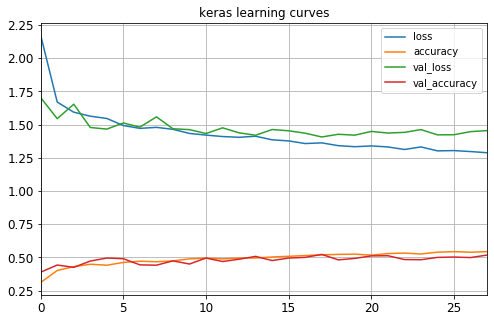

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

plt.title("keras learning curves")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

800/800 [==============================] - 0s 96us/sample - loss: 1.8382 - accuracy: 0.4050


[1.8381676292419433, 0.405]